# Analyze the usage.csv in this folder

In [1]:
import csv
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## data description

df2 usage_cpu_e3_t25_main.csv: CPU only transforms

df3 usage_e3_t25_gpu_transforms.csv: GPU transforms but with transfer to the CPU

df4 data/usage_cpu_torch_empty_cuda_e3_t25.csv: Experiment with CPU only transform but resetting the CUDA cache on every iteration -> Learn how deep the memory sinks in between iterations

df5 data/usage_GPU_transforms_e5_little_cpu_transfer.csv

df6 All transforms are done on the GPU and no transfer on the CPU is done..

Further descriptions are on notion!

Missing:
3) Debug batch data and see where else data might be on the GPU..


What did not work:

- deletion of all non relevant entries in the batch data - apparently they are not the problem..
- 

In [2]:
location = 'data/2/usage.csv' #df1
location = 'data/usage_cpu_e3_t25_main.csv' #df2
location = 'data/usage_e3_t25_gpu_transforms.csv' #df3
location = 'data/usage_cpu_torch_empty_cuda_e3_t25.csv' #df4
location = 'data/usage_GPU_transforms_e5_little_cpu_transfer.csv' #df5
location = 'data/usage_all_on_gpu_e_3.csv' #df6
# location = 'data/usage16.csv'
# location = 'data/usage17.csv'
# location = 'data/usage16.csv'
location = 'data/25_usage.csv' #df6
df = pd.read_csv(location) 

In [3]:
print(df.describe())

        device  context  utilization  total memory (MB)  free memory (MB)  \
count  67723.0      0.0      67723.0            67723.0      67723.000000   
mean       1.0      NaN          0.0            81920.0      50387.842402   
std        0.0      NaN          0.0                0.0      13423.156489   
min        1.0      NaN          0.0            81920.0       6181.000000   
25%        1.0      NaN          0.0            81920.0      40609.000000   
50%        1.0      NaN          0.0            81920.0      49849.000000   
75%        1.0      NaN          0.0            81920.0      61229.000000   
max        1.0      NaN          0.0            81920.0      80403.000000   

       used memory (MB)  memory not used by torch (MB)  cupy memory (MB)  
count      67723.000000                   67723.000000      67723.000000  
mean       31532.157598                     774.137619          1.961254  
std        13423.156489                     107.988387         24.978411  
min   

In [4]:
df["time"] = pd.to_datetime(df["time"])

In [5]:
# util = df.loc[:,"gpu util (%)"].rolling(5).sum()  / 5
# util.plot(subplots=True, figsize=(15,2),ylim=(0,1))

In [6]:
# df.loc[:,"free memory (MB)":'Memory not used by torch (MB)'].plot(
#     subplots=True, 
#     figsize=(15,10), 
#     ylim=(0,df.loc[:,"total memory (MB)"][0]))


In [7]:
# pd.DataFrame.plot(df.loc[:,"free memory (MB)":'Memory not used by torch (MB)'], subplots=True, 
#                 figsize=(15,10), 
#                 ylim=(0,df.loc[:,"total memory (MB)"][0]))

In [8]:
df["used memory moving average"] = df.loc[:,"used memory (MB)"].rolling(3600).sum()  / 3600

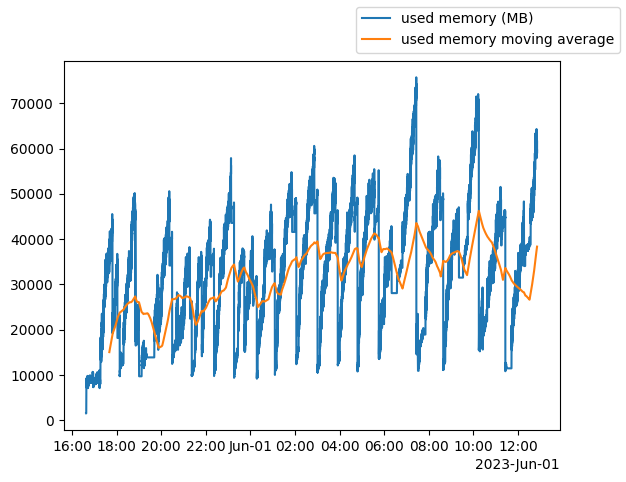

In [9]:
plot, ax = plt.subplots()
from_tick = 0
for i in ("used memory (MB)", "used memory moving average"):
    ax.plot(df.loc[from_tick:, 'time'], df.loc[from_tick:, i], label=i)
    
plot.legend()

cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf)

In [10]:
df.columns
df.shape[0]
df.loc[18000:, 'time']
# df.loc[:," total memory (MB)"][0]
# df.loc[:," Memory not used by torch (MB)"][10]

18000   2023-05-31 21:57:15
18001   2023-05-31 21:57:16
18002   2023-05-31 21:57:17
18003   2023-05-31 21:57:18
18004   2023-05-31 21:57:19
                ...        
67718   2023-06-01 12:51:42
67719   2023-06-01 12:51:43
67720   2023-06-01 12:51:44
67721   2023-06-01 12:51:45
67722   2023-06-01 12:51:46
Name: time, Length: 49723, dtype: datetime64[ns]